# I. CÂU HỎI


## Nội dung

**Doanh số bán hàng theo độ tuổi và giới tính là gì?**

## Mục đích


Những thông tin này có thể được sử dụng để hiểu rõ hơn về hành vi mua sắm của khách hàng, và từ đó đưa ra các quyết định kinh doanh sáng suốt hơn, như:

- Nhận biết nhóm khách hàng chi tiêu mạnh tay, từ đó tập trung vào việc tiếp thị và quảng cáo các sản phẩm và dịch vụ đến nhóm khách hàng này.
- Nhận biết nhóm khách hàng còn tiềm năng khai thác.

- Nâng cao trải nghiệm mua sắm của khách hàng.

- Xây dựng các chiến lược kinh doanh phù hợp với từng nhóm khách hàng.

- Tối ưu hóa các kênh phân phối và bán hàng.


___


# II. Tiền xử lý

## Import các thư viện cần thiết

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.colors as pc



## Load file `.csv` đã được qua xử lý

In [52]:
df = pd.read_csv("../data/preproccessed/preprocessed_dataset.csv")
df = df.drop_duplicates()
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14.0,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2.0,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23.0,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49.0,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31.0,PayPal,Annually


In [53]:
shopping_df = df.copy()

# III. Phân tích và trả lời

## Xem xét và chia nhóm các độ tuổi trong cột `Age`

Muốn trả lời câu hỏi, trước hết ta phải độ tuổi ra thành các nhóm để dễ dễ dàng nhận biết sự khác biệt trong hành vi mua sắm.
Đầu tiên, ta xem xét giá trị lớn nhất và nhỏ nhất trong cột `Age`

In [35]:
max_age = shopping_df['Age'].max()
min_age = shopping_df['Age'].min()

print("Giá trị lớn nhất của cột 'Age':", max_age)
print("Giá trị nhỏ nhất của cột 'Age':", min_age)

Giá trị lớn nhất của cột 'Age': 70
Giá trị nhỏ nhất của cột 'Age': 18


Ta có thể chia độ tuổi thành 6 bins, mỗi bins chứa khoảng 10 năm. Lý do chia như vậy là để đảm bảo rằng các bins có kích thước tương đương nhau, giúp cho việc phân tích dữ liệu được đơn giản hơn. 


In [104]:
age_bins = [17, 25, 35, 45, 55, 65 , 100]
age_labels = ['18-25', '26-35', '36-45', '46-55' , '56-65', '65+']
shopping_df['Age Group'] = pd.cut(shopping_df['Age'], bins=age_bins, labels=age_labels, right=False)

Ta xem thử sự phân bổ số lượng ở các nhóm tuổi.

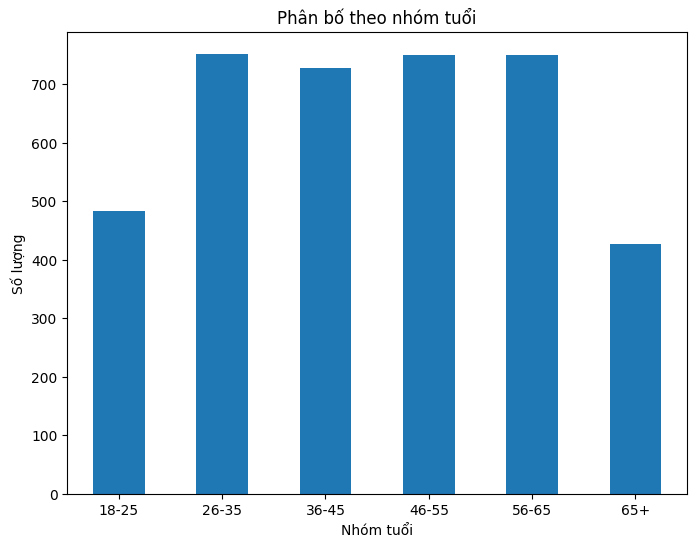

In [98]:
plt.figure(figsize=(8, 6))
shopping_df['Age Group'].value_counts().sort_index().plot(kind='bar')
plt.title('Phân bố theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.xticks(rotation=False)
plt.ylabel('Số lượng')
plt.show()

Nhận xét:
- Sự phân bố giữa các nhóm tuổi khá đều.
- Nhóm trên từ 26-35 tuổi có số lượng nhiều nhất.
- Nhóm tuổi 65+ ít nhất, nhưng nhóm này chỉ chứa từ 65 đến 70 tuổi, ít hơn 5 năm so với các nhóm khác.


## Xem xét sự phân chia về giới tính trong cột  `Gender`

Để hiểu rõ hơn về doanh số bán hàng theo giới tính, chúng ta cần xem xét sự phân chia về số lượng người mua hàng dựa trên từng giới tính.

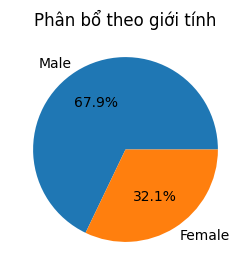

In [99]:
plt.figure(figsize=(3, 3))
plt.pie(shopping_df['Gender'].value_counts(), labels=shopping_df['Gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Phân bổ theo giới tính')
plt.show()

Nhận xét:
-  Nam giới mua hàng nhiều gấp đôi nữ giới

## Vẽ barchart biểu diễn doanh số bán hàng theo độ tuổi và giới tính

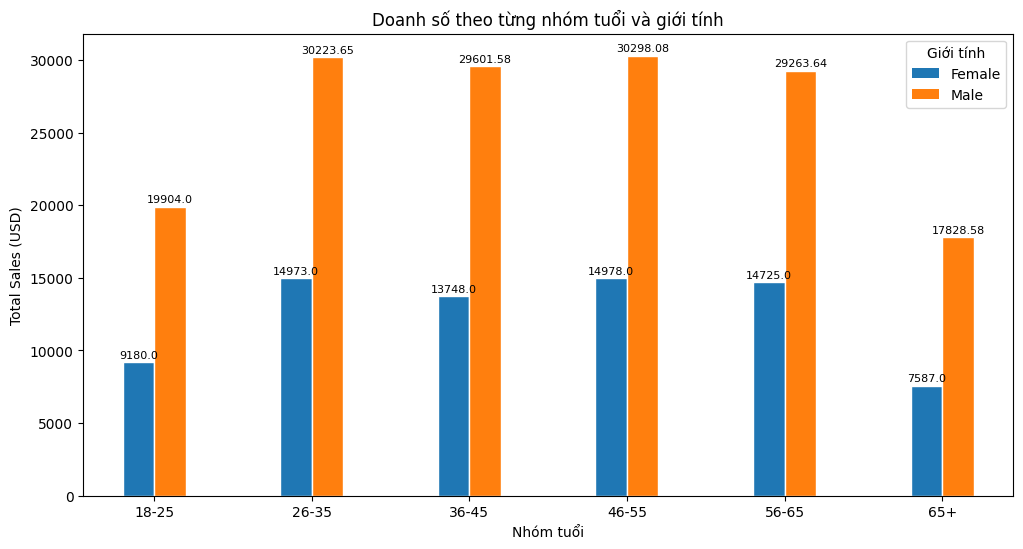

In [107]:

shopping_df['Age Group'] = pd.cut(shopping_df['Age'], bins=age_bins, labels=age_labels, right=False)

sales_by_age_gender = shopping_df.groupby(['Age Group', 'Gender'], observed=False)['Purchase Amount (USD)'].sum().unstack()


ax = sales_by_age_gender.plot(kind='bar', figsize=(12, 6),width=0.4)
plt.title('Doanh số theo từng nhóm tuổi và giới tính')
plt.xlabel('Nhóm tuổi')
plt.xticks(rotation=False)
plt.ylabel('Total Sales (USD)')
plt.legend(title='Giới tính')


for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',  fontsize= 8)
    
for container in ax.containers:
    for bar in container:
        bar.set_edgecolor('white')

plt.show()

**Nhận xét**

- Phân bố doanh số bán hàng theo nhóm tuổi và giới tính ở khá tương đồng với phân bố nhóm tuổi và giới tính mua sắm quần áo. 
- Nhóm nam mua hàng nhiều hơn, nên doanh thu cũng lớn hơn.
- Không có sự chênh lệch đáng kể giữa các nhóm tuổi.
- Nhóm 65+ và nhóm tuổi 18-25 có doanh số thấp nhất.
- Nhóm tuổi 46-55 có doanh thu lớn nhất.
- Khá khó để giải thích lý do tại sao nam giới lại mua sắm quần áo nhiều hơn nữ giới. Đây là dữ liệu do AI tạo ra, nên có khả năng sai sót. Một cách lý giải khác có thể là do nam giới thường có thu nhập cao hơn nữ giới, nên chi tiêu cũng nhiều hơn. Khả năng khác là cửa hàng chuyên bán đồ thời trang cho nam giới, nên số lượng nam giới sẽ nhiều hơn.
- Các nhóm tuổi chi tiêu nhiều cũng là những nhóm tuổi nằm trong độ tuổi lao động. 
- Từ kết quả trên ta biết được doanh số theo từng nhóm tuổi và giới tính, xác định ra tệp khách hàng đóng góp doanh thu chủ yếu, tệp khách hàng tiềm năng để xây dựng chiến lược kinh doanh phù hợp.



## Thông tin bổ sung

### Tần suất mua hàng theo từng nhóm tuổi và giới tính

Giúp hiểu rõ hơn về nhu cầu của khách hàng ở các nhóm tuổi và giới tính khác nhau. Cụ thể, ta có thể dùng thông tin này để:

- Xác định mức độ tiêu thụ hàng hóa của từng nhóm khách hàng.
- Xác định thời điểm nhập hàng phù hợp.
- Xác định số lượng hàng hóa cần nhập.

Từ đó xây dựng kế hoạch để tăng doanh thu, tối đa lợi nhuận.

Xem các giá trị tần suất mua hàng

In [85]:
shopping_df['Frequency of Purchases'].unique()

['Annually', 'Quarterly', 'Every 3 Months', 'Monthly', 'Fortnightly', 'Bi-Weekly', 'Weekly']
Categories (7, object): ['Annually' < 'Quarterly' < 'Every 3 Months' < 'Monthly' < 'Fortnightly' < 'Bi-Weekly' < 'Weekly']

### Vẽ sunburst chart biểu diễn tần xuất mua hàng theo giới tính

In [101]:

# Sắp xếp tần suất mua hàng theo thứ tự giảm dần
frequency_order = ['Annually', 'Quarterly', 'Every 3 Months' , 'Monthly', 'Fortnightly', 'Bi-Weekly','Weekly']


shopping_df['Frequency of Purchases'] = pd.Categorical(shopping_df['Frequency of Purchases'], categories=frequency_order, ordered=True)
fig = px.sunburst(shopping_df, path=['Gender', 'Frequency of Purchases'], title='Tần suất mua hàng theo giới tính')


fig.update_traces(
    textinfo='label+percent entry',
    textfont={
        "family": "tahoma",
        "size": 15,
    },
    
    hovertemplate="State: %{label}<br>Frequency: %{value:.0f}",
    sort=False, selector=dict(type='sunburst'))



fig.update_layout(
    margin=dict(t=0, l=0, r=0, b=0),
    height=600,  
    width=800,  
)

fig.show()

/home/binhng/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/plotly/express/_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Nhận xét:
- Không có sự khác biệt lớn giữa nam và nữ trong tần suất mua sắm.
- Các giá trị tuần suất mua sắm phân bổ đều nhau.

### Vẽ sunburst chart biểu diễn tần xuất mua hàng theo giới tính

In [110]:
# Sắp xếp tần suất mua hàng theo thứ tự giảm dần
frequency_order = ['Annually', 'Quarterly', 'Every 3 Months' , 'Monthly', 'Fortnightly', 'Bi-Weekly','Weekly']


shopping_df['Frequency of Purchases'] = pd.Categorical(shopping_df['Frequency of Purchases'], categories=frequency_order, ordered=True)


shopping_df['Age Group'] = pd.cut(shopping_df['Age'], bins=age_bins, labels=age_labels)
fig = px.sunburst(shopping_df, path=['Age Group', 'Frequency of Purchases'], title='Tần suất mua hàng theo nhóm tuổi')


fig.update_traces(
    textinfo='label+percent entry',
    textfont={
        "family": "tahoma",
        "size": 15,
    },
    
    hovertemplate="State: %{label}<br>Frequency: %{value:.0f}",
    sort=False, selector=dict(type='sunburst'))



fig.update_layout(
    margin=dict(t=0, l=0, r=0, b=0),
    height=600,  
    width=800,  
)

fig.show()

/home/binhng/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/plotly/express/_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/home/binhng/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/plotly/express/_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Nhận xét:
- Không có sự khác biệt lớn giữa các nhóm tuổi trong tần suất mua sắm.
- Các giá trị tuần suất mua sắm phân bổ đều nhau.